# Estymatory największej wiarygodności

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from scipy import optimize

# Zadanie 1
Napisz program, który losuje próbkę z rozkładu jednostajnego i rysuje funkcję gęstości rozkładu normalnego z parametrami $\mu=1$, $\sigma=1$. 

In [2]:
N = 100000
u=stats.uniform()
data = u.rvs(size=N)
mu= 0
sigma = 1

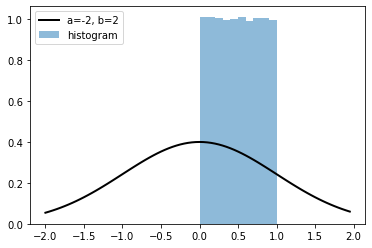

In [3]:
t = np.arange(-2, 2, 0.05)
num_bins = 50
fig, ax = plt.subplots(1, 1)
ax.hist(data, density=True, histtype='stepfilled', alpha=0.5, label='histogram')
ax.legend(loc='best', frameon=False)
ax.plot(t, stats.norm.pdf(t,mu, sigma), 'k-', lw=2, label='a=-2, b=2')
ax.legend()
plt.show()

# Zadanie 2
Napisz program, który losuje próbkę z rozkładu jednostajnego i rysuje funkcję gęstości rozkładu normalnego z parametrami 

<ul>
<li>$\mu=\frac{1}{n}\sum_{i=1}^n x_i$</li>
<li>$\sigma^2=\frac{1}{n} \sum_{i=1}^n(x_i - \mu)^2$</li>
</ul>

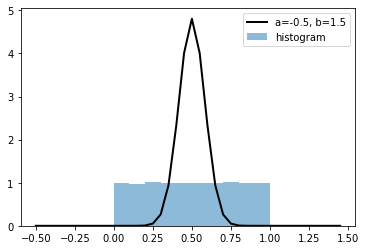

In [4]:
N = 100000
u=stats.uniform()
data = u.rvs(size=N)
mu = sum(data)/N
sigma = sum([(x - mu)**2 for x in data])/N
t = np.arange(-0.5, 1.5, 0.05)
num_bins = 50
fig, ax = plt.subplots(1, 1)
ax.hist(data, density=True, histtype='stepfilled', alpha=0.5, label='histogram')
ax.legend(loc='best', frameon=False)
ax.plot(t, stats.norm.pdf(t, mu, sigma), 'k-', lw=2, label='a=-0.5, b=1.5')
ax.legend()
plt.show()

# Zadanie 3
Napisz program, który losuje próbkę z rozkładu jednostajnego i rysuje funkcję gęstości rozkładu normalnego z parametrami otrzymanymi za pomocą funkcji <tt>fit()</tt> ze <tt>scipy.stats</tt>

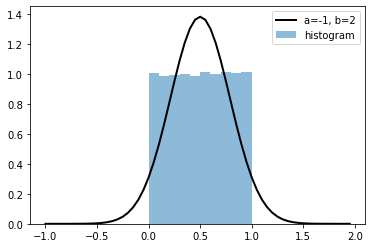

In [5]:
N = 100000
u=stats.uniform()
data = u.rvs(size=N)
u, sigma = stats.norm.fit(data)
t = np.arange(-1, 2, 0.05)
num_bins = 50
fig, ax = plt.subplots(1, 1)
ax.hist(data, density=True, histtype='stepfilled', alpha=0.5, label='histogram')
ax.legend(loc='best', frameon=False)
ax.plot(t, stats.norm.pdf(t, mu, sigma), 'k-', lw=2, label='a=-1, b=2')
ax.legend()
plt.show()

# Zadanie 4

Wiemy, że funkcja wiarygodnosci ma postać:

$$
L(X,m,\sigma)=\prod_{i=1}^n f_{m,\sigma} (x_i).
$$


Zaimplementuj logarytmiczną funkcję wiarygodności  dla rodziny rozkładów normalnych:

$$
l(X,m,\sigma)=\ln\left( L(X,m,\sigma) \right)=\ln\left(\prod_{i=1}^n f_{m,\sigma} (x_i) \right)=\sum_{i=1}^n \ln(f_{m,\sigma} (x_i))
$$

In [6]:
# split normal distribution pdf
def Gpdf(x, mu, sigma):
    return np.sqrt(2/np.pi) * 1/(2*sigma) * np.e ** (-(x-mu)**2/(2 * sigma**2))

In [7]:
def loglike(par):
    mu, sigma = par
    return -np.sum(np.log(Gpdf(data, mu, np.abs(sigma))))

# Zadanie 5
Policz MLE dla danych z rozkładu jednostajnego i parametrów:
<ul>
<li>$\mu=0$, $\sigma=1$</li>
<li>$\mu=0$, $\sigma=2$</li>
<li>$\mu=1$, $\sigma=1$</li>
<li>$\mu=0.5$, $\sigma=0.2$</li>
</ul>
Dla których wartości wychodzi wynik największy i dlaczego?

In [8]:
print(loglike((0, 1)))
print(loglike((0, 2)))
print(loglike((1, 1)))
print(loglike((0.5, 0.2)))

108649.20062829126
165397.40820341778
108485.19904459691
35283.72497647755


# Zadanie 6
Zapoznaj się z funkcją <tt>optimize.fmin_cg</tt>
https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.optimize.fmin_cg.html
i znajdż minimum funkcji

$$
f(x,y) = (x+1)^2+y^2
$$

In [9]:
def f(x):
    x1, x2 = x
    return (x1+1)**2+(x2)**2

x0 = np.asarray((0, 0))  # Initial guess.
res1 = optimize.fmin_cg(f, x0)
print(res1)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 9
         Gradient evaluations: 3
[-1.00000001e+00 -7.45058060e-09]


# Zadanie 7
Zminimalizuj funkcją wiarygodności z Zad. 5 (numerycznie).

Czy wyniki są podobne do wyniików z poprzednich zadań?

In [10]:
x0 = np.asarray((1,1))
res1 = optimize.fmin_cg(loglike, x0)
print(res1)

         Current function value: 17727.003604
         Iterations: 9
         Function evaluations: 162
         Gradient evaluations: 50
[0.50164001 0.28890179]


# Zadanie 8 (dla chętnych)
Wykonaj poprzednie zadanie wykorzystując pochodne http://faculty.washington.edu/ezivot/econ583/mleLectures.pdf.

# Zadanie 9
Napisz funkcję gęstości rozkładu Split Gaussian:

$$
SN(x;m,\sigma^2,\tau^2) = \left\{ \begin{array}{ll}
c \cdot \exp[-\frac{1}{2\sigma^2}(x-m)^2], & \textrm{for $x\leq m$},\\
c \cdot \exp[-\frac{1}{2\tau^2\sigma^2}(x-m)^2], & \textrm{for $x>m$},\\
\end{array} \right.
$$

gdzie $c=\sqrt{\frac{2}{\pi}}\sigma^{-1}(1+\tau)^{-1}$.

Narysuj gęstości dla parametrów:

<ul>
<li>$\mu=0$, $\sigma=1$, $\tau=1$</li>
<li>$\mu=0$, $\sigma=1$, $\tau=1/2$</li>
<li>$\mu=1$, $\sigma=1/2$, $\tau=1$</li>
</ul>

In [11]:
def split_norm_pdf(x, mu, sigma, tau):
    pivot = np.searchsorted(x, mu)
    x_lt_mu = x[:pivot]
    x_gte_mu = x[pivot:]
    return np.sqrt(2/np.pi) * 1/(sigma + tau) * np.concatenate([
           np.e ** (-(x_lt_mu-mu)**2/(2 * sigma**2)),
           np.e ** (-(x_gte_mu-mu)**2/(2 * tau**2))
    ])

# Zadanie 10

Wiemy, że funkcja wiarygodnosci ma postać:

$$
L(X,m,\sigma,\tau)=\prod_{i=1}^n f_{m,\sigma,\tau} (x_i).
$$

Zaimplementuj logarytmiczną funkcję wiarygodności  dla rodziny rozkładów Split Normal:

$$
l(X,m,\sigma,\tau)=\ln\left( L(X,m,\sigma,\tau) \right)=\ln\left(\prod_{i=1}^n f_{m,\sigma,\tau} (x_i) \right)=\sum_{i=1}^n \ln(f_{m,\sigma,\tau} (x_i))
$$

In [12]:
def split_loglike(args):
    mu, sigma, tau = args
    return -np.sum(np.log(split_norm_pdf(data, mu, np.abs(sigma), np.abs(tau))))

# Zadanie 11
Zminimalizuj funkcją wiarygodności z Zad. 10 (numerycznie).

In [13]:
x0 = np.asarray((1,1,1))
res1 = optimize.fmin_cg(split_loglike, x0)
print(res1)

/home/kuba/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/home/kuba/anaconda3/lib/python3.7/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/kuba/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/home/kuba/anaconda3/lib/python3.7/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


         Current function value: -16920.314652
         Iterations: 4
         Function evaluations: 347
         Gradient evaluations: 84
[0.3975945  0.05689064 0.31752574]


# Zadanie 12
Zaimportuj dane <tt>datasets</tt> i wyestymuj rozkład normalny i Split Normal dla <tt>boston.data[:,7]</tt>.

Rozpocznij procedurę minimalizacji od warunku początkowego:

<ul>
<li>mu=np.mean(data)</li>
<li>sigma=np.std(data)</li>
<li>tau=np.std(data)</li>
</ul>

Który rozkład lepiej pasuje do danych?

In [14]:
from sklearn import datasets
boston = datasets.load_boston()
data=boston.data[:,7]

In [15]:
mu    = np.mean(data)
sigma = np.std(data)
tau   = np.std(data)

print(mu, sigma, tau)

x0 = np.asarray((mu,sigma))
x1 = np.asarray((mu,sigma,tau))
res0 = optimize.fmin_cg(loglike, x0)
res1 = optimize.fmin_cg(split_loglike, x1)

print(res0)
print(res1)

3.795042687747036 2.1036283563444593 2.1036283563444593
         Current function value: 1094.276701
         Iterations: 0
         Function evaluations: 126
         Gradient evaluations: 38
         Current function value: 1076.375988
         Iterations: 7
         Function evaluations: 87
         Gradient evaluations: 19
[3.79504269 2.10362836]
[3.79686448 1.71307862 2.34794015]


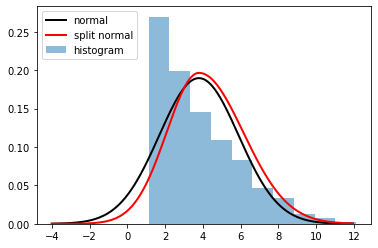

In [19]:
fig, ax = plt.subplots(1, 1)
ax.hist(data, density=True, histtype='stepfilled', alpha=0.5, label='histogram')
ax.legend(loc='best', frameon=False)
t = np.arange(-4, 12, 0.05)
ax.plot(t, Gpdf(t, *res0), 'k-', lw=2, label='normal')
ax.plot(t, split_norm_pdf(t, *res1), 'k-', lw=2, label='split normal', color='r')
ax.legend()
plt.show()